## Imports

In [1]:
import tensorflow
import numpy
from matplotlib import pyplot
import cv2
import os
import random
import pickle
import keras
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils.vis_utils import plot_model
import seaborn

In [2]:
print("Number of GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Number of GPUs Available:  0


## Configurations

In [3]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [4]:
Training_Data_Path="../Data/Main_Data/Training_Data/"
Testing_Data_Path="../Data/Main_Data/Testing_Data/"

In [5]:
class_list=os.listdir(Training_Data_Path)

In [6]:
class_list

['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [7]:
Object_Data_Path="../Data/Preprocessed_Data/"

In [8]:
pickle_training_features=open(Object_Data_Path+"pickle_training_features.pickle","rb")
Training_Features=pickle.load(pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Object_Data_Path+"pickle_training_labels.pickle","rb")
Training_Label=pickle.load(pickle_training_labels)
pickle_training_labels.close()

In [9]:
pickle_testing_features=open(Object_Data_Path+"pickle_testing_features.pickle","rb")
Testing_Features=pickle.load(pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Object_Data_Path+"pickle_testing_labels.pickle","rb")
Testing_Label=pickle.load(pickle_testing_labels)
pickle_testing_labels.close()

In [10]:
Training_Features.shape

(6000, 160, 160)

In [13]:
Training_Features[0]

array([[ 77,  96,  89, ...,  46,  47,  48],
       [ 83,  97,  99, ...,  47,  51,  53],
       [ 99, 109, 110, ...,  52,  54,  56],
       ...,
       [219, 218, 219, ...,  39,  39,  39],
       [218, 218, 219, ...,  38,  39,  39],
       [217, 217, 219, ...,  38,  38,  39]], dtype=uint8)

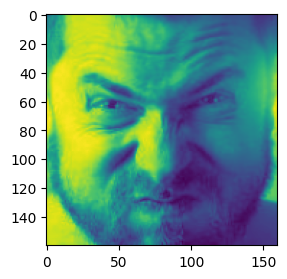

In [14]:
pyplot.imshow(Training_Features[0])

In [15]:
Training_Label[0]

0

In [16]:
class_list[Training_Label[0]]

'anger'

In [17]:
Testing_Features.shape

(3000, 160, 160)

In [18]:
Testing_Features[0]

array([[30, 40, 31, ...,  9,  8,  9],
       [24, 35, 27, ..., 10,  8,  8],
       [17, 26, 22, ..., 12,  8,  6],
       ...,
       [43, 38, 25, ..., 11, 11, 11],
       [42, 37, 23, ..., 13, 13, 13],
       [40, 35, 21, ..., 16, 16, 16]], dtype=uint8)

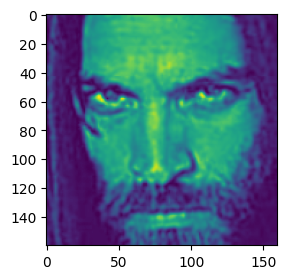

In [19]:
pyplot.imshow(Testing_Features[0])

In [20]:
Testing_Label[0]

0

In [21]:
class_list[Testing_Label[0]]

'anger'

## Praparing Data for Training

### Only for Black and White Images

In [22]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)

In [23]:
Training_Features.shape

(6000, 160, 160, 1)

In [24]:
Testing_Features.shape

(3000, 160, 160, 1)

In [25]:
input_dimension=Training_Features[0].shape

In [26]:
input_dimension

(160, 160, 1)

# Model Definition

In [27]:
Model=keras.models.Sequential([
         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=input_dimension),
         keras.layers.MaxPooling2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu'),
         keras.layers.MaxPooling2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=256, activation='relu'),
         keras.layers.Dense(units=64, activation='relu'),
         keras.layers.Dense(units=len(class_list), activation='softmax')
    ]
 )

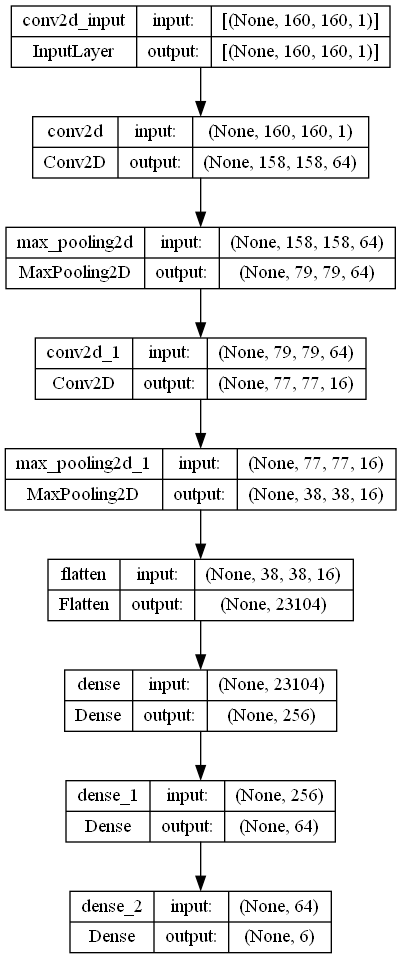

In [28]:
plot_model(Model, to_file='defined_model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
Model.summary(expand_nested=True,show_trainable=True,)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d (Conv2D)             (None, 158, 158, 64)      640       Y          
                                                                            
 max_pooling2d (MaxPooling2D  (None, 79, 79, 64)       0         Y          
 )                                                                          
                                                                            
 conv2d_1 (Conv2D)           (None, 77, 77, 16)        9232      Y          
                                                                            
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 16)       0         Y          
 2D)                                                                        
                                                                            
 flatten (Flatten)           (None, 23104)             0

In [30]:
Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [31]:
Model.fit(
    Training_Features,Training_Label,
    epochs=10,
    verbose=1,
    validation_data=(Testing_Features,Testing_Label)
)

Epoch 1/10
188/188 [==============================] - 162s 859ms/step - loss: 7.7693 - accuracy: 0.1735 - val_loss: 1.7898 - val_accuracy: 0.1797
Epoch 2/10
188/188 [==============================] - 164s 874ms/step - loss: 1.7669 - accuracy: 0.2160 - val_loss: 1.8082 - val_accuracy: 0.1827
Epoch 3/10
188/188 [==============================] - 161s 858ms/step - loss: 1.6619 - accuracy: 0.2883 - val_loss: 1.9129 - val_accuracy: 0.1873
Epoch 4/10
188/188 [==============================] - 161s 859ms/step - loss: 1.4154 - accuracy: 0.4163 - val_loss: 2.0773 - val_accuracy: 0.1970
Epoch 5/10
188/188 [==============================] - 163s 868ms/step - loss: 1.0988 - accuracy: 0.5613 - val_loss: 2.9835 - val_accuracy: 0.2083
Epoch 6/10
188/188 [==============================] - 162s 860ms/step - loss: 0.8850 - accuracy: 0.6540 - val_loss: 3.9509 - val_accuracy: 0.2090
Epoch 7/10
188/188 [==============================] - 161s 854ms/step - loss: 0.7105 - accuracy: 0.7367 - val_loss: 3.6469 -

## Evaluation

In [32]:
Testing_Predictions=Model.predict(Testing_Features)

94/94 [==============================] - 16s 165ms/step


In [33]:
Testing_Predictions[0]

array([9.9998617e-01, 1.7654309e-12, 2.8469646e-10, 1.3803552e-05,
       1.4252480e-13, 6.0340461e-12], dtype=float32)

In [34]:
numpy.argmax(Testing_Predictions[0])

0

In [35]:
Testing_Label[0]

0

In [36]:
classification_data=confusion_matrix(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
)

In [37]:
classification_data

array([[134,  57,  69,  57, 120,  63],
       [ 91, 108,  58,  82, 115,  46],
       [ 90,  85,  79,  62, 109,  75],
       [ 80,  61,  60, 109, 137,  53],
       [104,  92,  57,  82, 124,  41],
       [ 83,  74,  76,  54, 102, 111]], dtype=int64)

<AxesSubplot: >

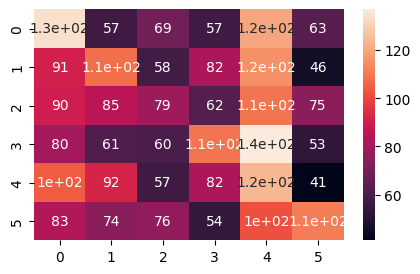

In [40]:
seaborn.heatmap(classification_data,annot=True)

In [41]:
print(classification_report(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
))

              precision    recall  f1-score   support

       anger       0.23      0.27      0.25       500
     disgust       0.23      0.22      0.22       500
        fear       0.20      0.16      0.18       500
       happy       0.24      0.22      0.23       500
         sad       0.18      0.25      0.21       500
    surprise       0.29      0.22      0.25       500

    accuracy                           0.22      3000
   macro avg       0.23      0.22      0.22      3000
weighted avg       0.23      0.22      0.22      3000



In [42]:
Model.save("./Models/DefinedModel.h5")

# Model Saving

In [43]:
Model.save("../Model/DefinedModel.h5")